In [2]:
import pandas as pd

In [5]:
train = pd.read_csv('./bike_data/train.csv', parse_dates=['datetime'])
test = pd.read_csv('./bike_data/test.csv', parse_dates=['datetime'])
sub = pd.read_csv('./bike_data/sampleSubmission.csv')

train.shape, test.shape, sub.shape

((10886, 12), (6493, 9), (6493, 2))

In [6]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


### 01. 데이터 날짜는 언제부터 언제까지 데이터일까?

In [9]:
import matplotlib.pyplot as plt
import matplotlib

In [10]:
train.datetime.describe()

<ipython-input-10-120836598240>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.datetime.describe()


count                   10886
unique                  10886
top       2011-06-09 04:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-19 23:00:00
Name: datetime, dtype: object

In [12]:
test.datetime.describe()

<ipython-input-12-4a40a462566f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  test.datetime.describe()


count                    6493
unique                   6493
top       2011-09-21 10:00:00
freq                        1
first     2011-01-20 00:00:00
last      2012-12-31 23:00:00
Name: datetime, dtype: object

* train 시간은: 2011-01-01 ~ 2012-12-19 
* test 시간은: 2011-01-20 ~ 2012-12-31

### 2. 실제 빌린 대수(count)와 다른 정보간의 관계는 어떤 관계가 있을까?

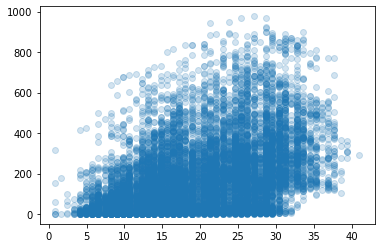

In [14]:
plt.plot(train['temp'], train['count'], 'o', alpha=0.2)

In [17]:
import seaborn as sns

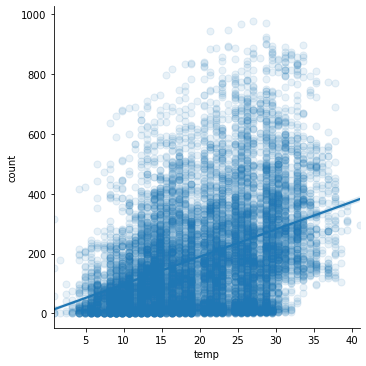

In [18]:
sns.lmplot(x='temp', y='count', data=train, scatter_kws={'s': 50, 'alpha': 0.1})

### 03. count화 다른 변수간의 관계 확인 - corr() 상관계수

In [15]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


* 상관계수: 0~1, -1~0

In [20]:
train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

In [21]:
train.corr()['count'].abs().sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
humidity      0.317371
season        0.163439
weather       0.128655
windspeed     0.101369
workingday    0.011594
holiday       0.005393
Name: count, dtype: float64

In [22]:
data = train.corr()['count'].abs().sort_values(ascending=True)
print(data.index)
print(data.values)

Index(['holiday', 'workingday', 'windspeed', 'weather', 'season', 'humidity',
       'atemp', 'temp', 'casual', 'registered', 'count'],
      dtype='object')
[0.00539298 0.01159387 0.10136947 0.1286552  0.16343902 0.31737148
 0.38978444 0.39445364 0.69041357 0.97094811 1.        ]


<BarContainer object of 11 artists>

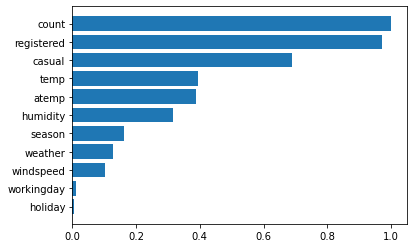

In [23]:
plt.barh(data.index, data.values)

### 04. 계절별 데이터는 어떤 패턴을 가질까? 

In [25]:
train['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

<BarContainer object of 4 artists>

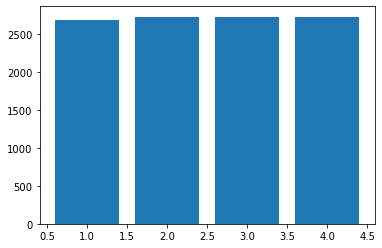

In [26]:
data = train['season'].value_counts()
plt.bar(data.index, data.values)

### 05. 쉬는날과 쉬는 날이 아닌 데이터는 어떤 패턴을 가질까?

In [29]:
train['holiday'].unique()

array([0, 1], dtype=int64)

In [30]:
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<BarContainer object of 2 artists>

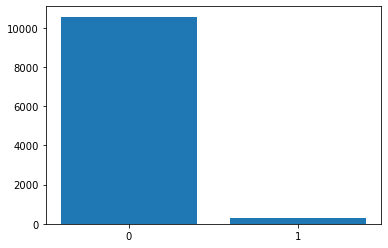

In [33]:
data = train['holiday'].value_counts()
plt.bar(data.index.astype(str), data.values)

 * 0에 비해 1이 상당히 작은 개수의 데이터를 갖는다. 

In [35]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<BarContainer object of 4 artists>

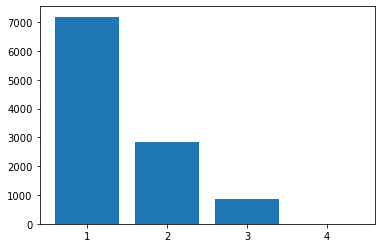

In [36]:
data = train['weather'].value_counts()
plt.bar(data.index.astype(str), data.values)

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

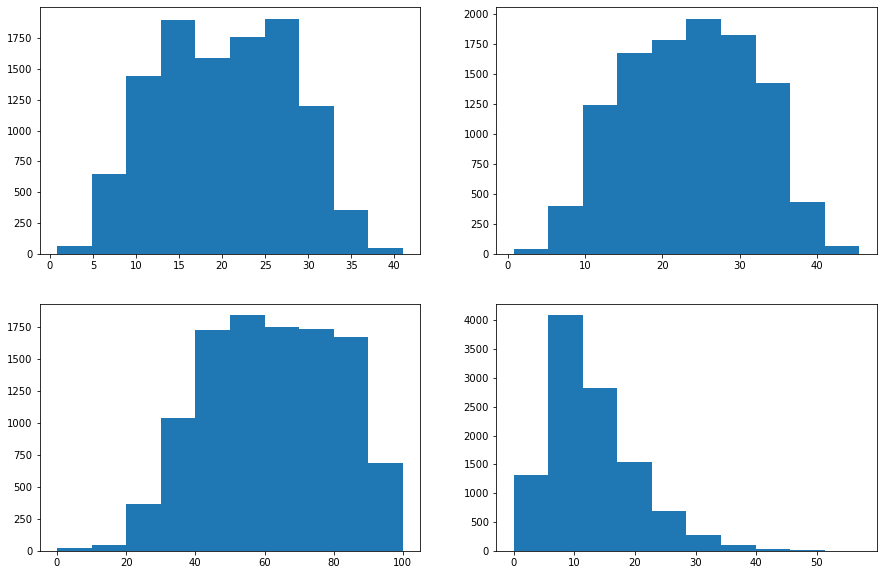

In [37]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(train.temp)

plt.subplot(2, 2, 2)
plt.hist(train.atemp)

plt.subplot(2, 2, 3)
plt.hist(train.humidity)

plt.subplot(2, 2, 4)
plt.hist(train.windspeed)